#  MSCA 37011 - Deep Learning and Image Recognition

## ANN Classification to predict diabetes

Use ANN to make predictions on stuructured data and then increase the complexity of the model.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [4]:
#read in training data
train_df = pd.read_csv('data/diabetes_data.csv')

#view data structure
train_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['diabetes'])

#check that the target variable has been removed
train_X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
#one-hot encode target column
train_y = to_categorical(train_df.diabetes)

#vcheck that target column has been converted
train_y[0:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [7]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add layers to model
model.add(Dense(20, activation='relu', input_shape=(n_cols,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 42        
Total params: 1,062
Trainable params: 1,062
Non-trainable params: 0
_________________________________________________________________


In [9]:
#train model
history = model.fit(train_X, train_y, epochs=30, validation_split=0.2, callbacks=[early_stopping_monitor])

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 0s 216us/step - loss: 2.8945 - accuracy: 0.4674 - val_loss: 1.2446 - val_accuracy: 0.5909
Epoch 2/30
614/614 [==============================] - 0s 44us/step - loss: 1.0805 - accuracy: 0.5309 - val_loss: 0.7943 - val_accuracy: 0.6234
Epoch 3/30
614/614 [==============================] - 0s 41us/step - loss: 0.8130 - accuracy: 0.6319 - val_loss: 0.6522 - val_accuracy: 0.6688
Epoch 4/30
614/614 [==============================] - 0s 39us/step - loss: 0.7709 - accuracy: 0.6433 - val_loss: 0.6506 - val_accuracy: 0.6558
Epoch 5/30
614/614 [==============================] - 0s 41us/step - loss: 0.7440 - accuracy: 0.6450 - val_loss: 0.6705 - val_accuracy: 0.6169
Epoch 6/30
614/614 [==============================] - 0s 39us/step - loss: 0.6877 - accuracy: 0.6938 - val_loss: 0.6208 - val_accuracy: 0.6558
Epoch 7/30
614/614 [==============================] - 0s 37us/step - loss: 0.6617 - accuracy: 0

### Plot Loss Curve

Text(0.5, 1.0, 'Loss Curves')

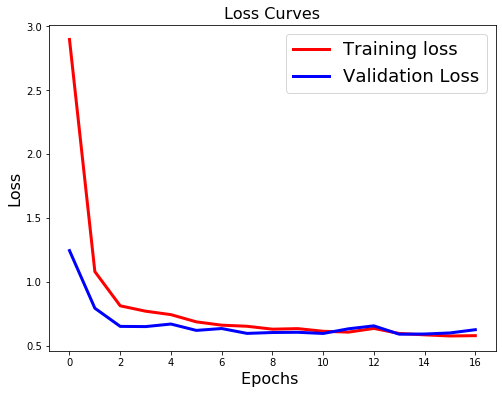

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)